In [12]:
import pandas as pd
from random_forests import *
df = pd.read_csv("full_data.csv")

# Raw Data

In [13]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


# Pre-processing 
Discussed in the Project Proposal

In [14]:
def standard_preprocessing(df):
    # Remove unknown smokers
    df = df[df['smoking_status'] != 'Unknown']
    # Bin Ages
    df['age'] = pd.cut(df["age"], bins=[0, 18, 30, 50, 65, 82])
    return df

# Encoding for Categorical Variables
Target encoding -> Setting the category value to it's association with success

One-hot encoding -> Creating binary values for each category within a categorical variable

Target encoding saw improved results for this dataset, so it was used instead

In [15]:
# One-hot Encoding
def one_hot_encode(df, name):
    df[[x + '_' + name for x in df[name].unique()]] = [[1 if x == y else 0 for x in df[name].unique()] for y in df[name]]
    df = df.drop(name, axis=1)

# Target Encoding
def target_encode(df, name):
    dfe = df.groupby(name)[['stroke']].sum().rename(columns={"stroke":"Target 1"})
    dfe["Target 0"] = df[df["stroke"] == 0].size - dfe["Target 1"]
    dfe["Probability"] = dfe["Target 1"] / dfe["Target 0"]
    df[name] = df[name].map(dfe["Probability"].to_dict())
    return df

# Process Data

In [16]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler


def rf_preprocessing(df):
    # Ordinal Encoding
    df['smoking_status'] = df['smoking_status'].map({'never smoked':0 , 'formerly smoked':0.5, 'smokes':1})
    df['age'] = df['age'].map({x:(y/df['age'].unique().size) for x,y in zip(df['age'].unique(), range(df['age'].unique().size))})

    # Target Encoding
    for x in ["Residence_type", "work_type"]:
        target_encode(df, x)

    # Setting Binary values to numerical values
    df['gender'] = [int(x == 'Male') for x in df['gender']]
    df['ever_married'] = [int(x == 'Yes') for x in df['ever_married']]

    # Standard Scaling Data
    df['bmi'] = StandardScaler().fit_transform([[x] for x in df['bmi']])
    df['avg_glucose_level'] = StandardScaler().fit_transform([[x] for x in df['avg_glucose_level']])
    df['gender'] = StandardScaler().fit_transform([[x] for x in df['gender']])
    df['ever_married'] = StandardScaler().fit_transform([[x] for x in df['ever_married']])

    return df

df = pd.read_csv("full_data.csv")

df = standard_preprocessing(df)
df = rf_preprocessing(df)

C:\Users\Ewen\AppData\Local\Temp\ipykernel_59908\666153676.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'] = pd.cut(df["age"], bins=[0, 18, 30, 50, 65, 82])
C:\Users\Ewen\AppData\Local\Temp\ipykernel_59908\40864611.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['smoking_status'] = df['smoking_status'].map({'never smoked':0 , 'formerly smoked':0.5, 'smokes':1})


# Processed Data

In [17]:
X, Y = df.drop("stroke", axis=1).to_numpy(), df["stroke"].to_numpy()

df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.232401,0.0,0,1,0.557331,0.003309,0.002947,2.491781,1.090636,0.5,1
1,1.232401,0.0,0,1,0.557331,0.003309,0.002640,-0.059201,0.432257,0.0,1
2,-0.811424,0.2,0,0,0.557331,0.003309,0.002947,1.297846,0.737359,1.0,1
3,-0.811424,0.0,1,0,0.557331,0.001582,0.002640,1.357896,-0.932676,0.0,1
4,1.232401,0.0,0,0,0.557331,0.003309,0.002947,1.609108,-0.129774,0.5,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,1.232401,0.2,0,0,-1.794267,0.003309,0.002640,-0.802450,-0.001310,0.5,0
4977,1.232401,0.2,0,0,0.557331,0.003309,0.002947,1.711754,0.207444,1.0,0
4978,-0.811424,0.2,1,0,0.557331,0.000693,0.002640,-0.285687,0.319850,1.0,0
4979,1.232401,0.2,0,0,0.557331,0.003309,0.002640,-0.515914,0.030806,1.0,0


[0.30531197 0.22733303]


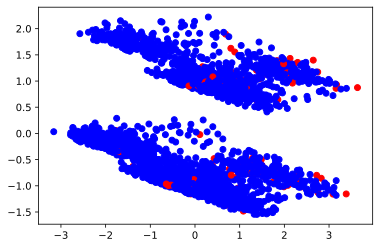

In [18]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(2)
x_pca = pca.fit_transform(X)
print(pca.explained_variance_ratio_)

plt.scatter(x_pca[:, 0], x_pca[:, 1], c=['red' if y == 1 else 'blue' for y in Y])

In [19]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(n_estimators=35)
clf = clf.fit(X)
pd.DataFrame(clf.predict(X)).reset_index().groupby(0).count()

,index
0,
-1,1770
1,1711


In [20]:
# df['Outlier'] = clf.predict(X)

In [21]:
# df = df[df["Outlier"] != -1]
# df = df.drop("Outlier", axis=1)
# df

# Create Train-test Split

In [22]:
from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [65]:
print("Train Size: ",X_train.shape[0])
print("Train Number of Positive: ", y_train.sum())
print("Train Number of Negative: ", X_train.shape[0] - y_train.sum())

print("Test Size: ",X_test.shape[0])
print("Test Number of Positive: ", y_test.sum())
print("Test Number of Negative: ", X_test.shape[0] - y_test.sum())

Train Size:  2784
Train Number of Positive:  152
Train Number of Negative:  2632
Test Size:  697
Test Number of Positive:  49
Test Number of Negative:  648


# Metrics
Calculate F1, Recall, Precision and Accuracy

In [73]:
def metrics(model, x_test, y_test, out=True):
    TP, TN, FP, FN = 0, 0, 0, 0

    y_pred = model.predict(x_test)
    for y, y_p in zip(y_test, y_pred):
        # Negative
        if y == 0:
            # True
            if y_p == 0:
                TN += 1
            # False
            else:
                FP += 1
        # Postive
        else:
            # False
            if y_p == 0:
                FN += 1
            # True
            else:
                TP += 1

    # Metrics
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    accuracy = (TP + TN) / (FN + FP + TP + TN)
    f1 = (2*TP)/(2*TP + FP + FN) if (2*TP)/(2*TP + FP + FN) > 0 else 0

    if (out):
        print("Precision:", precision)
        print("Recall:", recall)
        print("Accuracy:", accuracy)
        print("F1:", f1)
        print('TP',TP, 'TN', TN, 'FP', FP, 'FN', FN)

    return {"Precision": precision,
            "Recall": recall,
            "Accuracy": accuracy,
            "F1": f1,
            'TP': TP, 'TN': TN, 'FP': FP, 'FN': FN}

# Metric Storage

In [66]:
metricDf = pd.DataFrame()

# Self-implemented Model

In [67]:
from random_forests import random_Forest_Classifier
import random

rfC = random_Forest_Classifier(max_depth=35, max_features=3, min_samples_split=2, n_estimators=15)
rfC.fit(X_train, y_train)
metric = metrics(rfC, X_test, y_test)
metricDf = pd.DataFrame(metric, index=["Self-Implemented"])

OOB estimate: 0.68
Precision: 0.04510361641609102
Recall: 0.7302631578947368
Accuracy: 0.1411637931034483
F1: 0.08495981630309989
TP 111 TN 282 FP 2350 FN 41


# SKLearn Model

In [68]:
from sklearn.ensemble import RandomForestClassifier

Sk_rfC = RandomForestClassifier(n_estimators=15, max_features=3, verbose=1, max_depth=35)
Sk_rfC = Sk_rfC.fit(X_train, y_train)
metric = metrics(Sk_rfC, X_test, y_test)
metricDf.loc["SKlearn"] = metric.values()

Precision: 1.0
Recall: 0.9078947368421053
Accuracy: 0.9949712643678161
F1: 0.9517241379310345
TP 138 TN 2632 FP 0 FN 14


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.0s finished


# XGBoost Model

In [69]:
import xgboost

xgb = xgboost.XGBClassifier(n_estimators=25, max_depth=35)
xgb = xgb.fit(X_train, y_train)
metric = metrics(xgb, X_test, y_test)
metricDf.loc["XGBoost"] = metric.values()

Precision: 1.0
Recall: 0.868421052631579
Accuracy: 0.992816091954023
F1: 0.9295774647887324
TP 132 TN 2632 FP 0 FN 20


# Key Results

In [70]:
metricDf

,Precision,Recall,Accuracy,F1,TP,TN,FP,FN
Self-Implemented,0.045104,0.730263,0.141164,0.084960,111.0,282.0,2350.0,41.0
SKlearn,1.000000,0.907895,0.994971,0.951724,138.0,2632.0,0.0,14.0
XGBoost,1.000000,0.868421,0.992816,0.929577,132.0,2632.0,0.0,20.0


# Test results

In [71]:
per_rf = []
acc_rf = []
re_rf = []
f1_rf = []

per_skrf = []
acc_skrf = []
re_skrf = []
f1_skrf = []

per_xg = []
acc_xg = []
re_xg = []
f1_xg = []

# Metrics {"Precision:": precision,
#             "Recall:": recall,
#             "Accuracy:": accuracy,
#             "F1:": F1,
#             'TP': TP, 'TN': TN, 'FP': FP, 'FN': FN}

for i in range(0, 25):    
    X, Y = df.drop("stroke", axis=1).to_numpy(), df["stroke"].to_numpy()
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

    rfC = random_Forest_Classifier(max_depth=35, max_features=3, min_samples_split=2, n_estimators=15)
    rfC.fit(X_train, y_train)

    metric = metrics(rfC, X_test, y_test)

    per_rf.append(metric['Precision'])
    acc_rf.append(metric['Accuracy'])
    re_rf.append(metric['Recall'])
    f1_rf.append(metric['F1'])

    Sk_rfC = RandomForestClassifier(n_estimators=15, max_depth=35)
    Sk_rfC = Sk_rfC.fit(X_train, y_train)
    
    metric = metrics(Sk_rfC, X_test, y_test, out=False)

    per_skrf.append(metric['Precision'])
    acc_skrf.append(metric['Accuracy'])
    re_skrf.append(metric['Recall'])
    f1_skrf.append(metric['F1'])

    xgb = xgboost.XGBClassifier(n_estimators=15, max_depth=35)
    xgb = xgb.fit(X_train, y_train)
    metric = metrics(xgb, X_test, y_test, out=False)

    per_xg.append(metric['Precision'])
    acc_xg.append(metric['Accuracy'])
    re_xg.append(metric['Recall'])
    f1_xg.append(metric['F1'])


OOB estimate: 0.48
Precision: 0.07854984894259819
Recall: 0.5306122448979592
Accuracy: 0.5294117647058824
F1: 0.1368421052631579
TP 26 TN 343 FP 305 FN 23
OOB estimate: 0.45
Precision: 0.043795620437956206
Recall: 0.2857142857142857
Accuracy: 0.5810616929698709
F1: 0.0759493670886076
TP 12 TN 393 FP 262 FN 30
OOB estimate: 0.59
Precision: 0.046125461254612546
Recall: 0.7575757575757576
Accuracy: 0.2467718794835007
F1: 0.08695652173913043
TP 25 TN 147 FP 517 FN 8
OOB estimate: 0.55
Precision: 0.04375
Recall: 0.4883720930232558
Accuracy: 0.3098995695839311
F1: 0.08030592734225621
TP 21 TN 195 FP 459 FN 22
OOB estimate: 0.46
Precision: 0.020833333333333332
Recall: 0.12195121951219512
Accuracy: 0.6111908177905309
F1: 0.03558718861209965
TP 5 TN 421 FP 235 FN 36
OOB estimate: 0.66
Precision: 0.03327495621716287
Recall: 0.5757575757575758
Accuracy: 0.18794835007173602
F1: 0.06291390728476821
TP 19 TN 112 FP 552 FN 14
OOB estimate: 0.48
Precision: 0.047021943573667714
Recall: 0.35714285714285

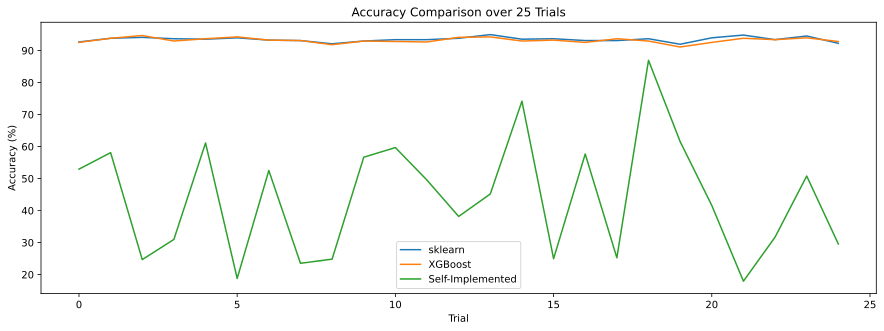

In [97]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.set_size_inches(15, 5)

ax.set_title("Accuracy Comparison over 25 Trials")

ax.set_ylabel("Accuracy (%)")
ax.set_xlabel("Trial")

ax.plot([x*100 for x in acc_skrf], label='sklearn')
ax.plot([x*100 for x in acc_xg], label='boost')
ax.plot([x*100 for x in acc_rf], label='self')
ax.legend(["sklearn", "XGBoost", "Self-Implemented"])

plt.show()

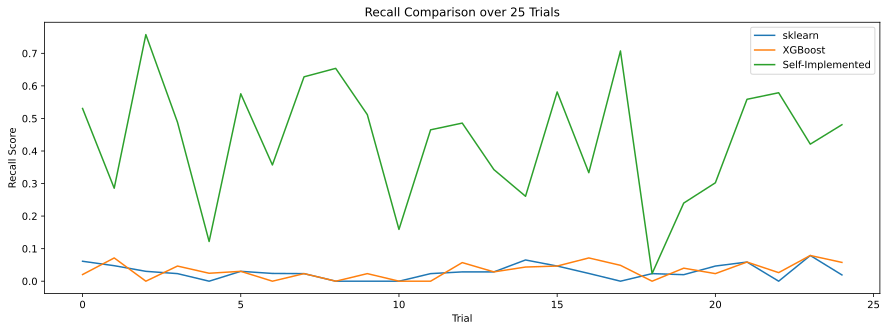

In [100]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.set_size_inches(15, 5)

ax.set_title("Recall Comparison over 25 Trials")

ax.set_ylabel("Recall Score")
ax.set_xlabel("Trial")

ax.plot(re_skrf, label='sklearn')
ax.plot(re_xg, label='boost')
ax.plot(re_rf, label='self')
ax.legend(["sklearn", "XGBoost", "Self-Implemented"])

plt.show()

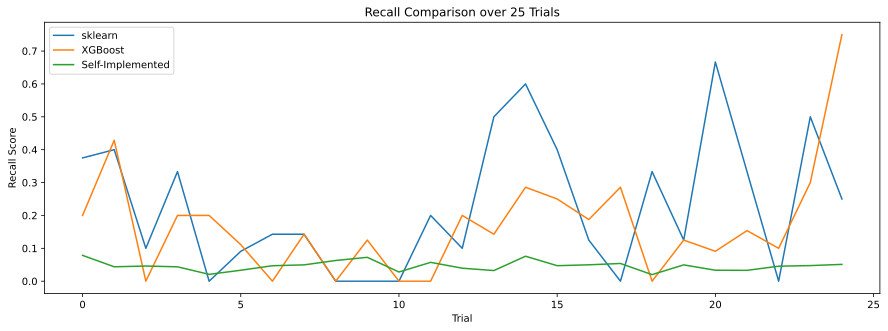

In [101]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.set_size_inches(15, 5)

ax.set_title("Precision Comparison over 25 Trials")

ax.set_ylabel("Precision Score")
ax.set_xlabel("Trial")

ax.plot(per_skrf, label='sklearn')
ax.plot(per_xg, label='boost')
ax.plot(per_rf, label='self')
ax.legend(["sklearn", "XGBoost", "Self-Implemented"])

plt.show()